In [3]:
from Data_Core.experiment import *
%matplotlib notebook

In [2]:
from shutil import copy

folder = r'data/Mapa_Moscovite_final/'
folders = [folder+f+'/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
folder_copy = r'data/Map/'

for i in range(0,len(folders)):
    files = [folders[i]+f for f in os.listdir(folders[i]) if '1703275U8' not in f and '0000' not in f]
    
    if not os.path.exists(folder_copy+folders[i]):
        os.makedirs(folder_copy+folders[i])
    for j in range(0,len(files)):
        copy(files[j],folder_copy+folders[i])

In [4]:
#folder = r"data/Map/data/Mapa_Moscovite_final/"
folder= r'C:/Users/Diana/Desktop/INESC TEC 2021/Adaptative_Meshing/Mapa_final/'
folders = [folder+f+'/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
current_experiment = experiment(folders[0])
list_of_experiments = [experiment(f) for f in folders]
current_experiment.concatenate(list_of_experiments)

In [5]:
for i in range(len(current_experiment.list_of_signals)):
    print('Removing baseline ' + str(i) + ' of ' +str(len(current_experiment.list_of_signals)),end='\r')
    current_experiment.list_of_signals[i].remove_baseline()

In [6]:
current_experiment.list_of_signals[0].wavelengths

[array([177.84457397, 177.88824463, 177.93188477, ..., 254.63226318,
        254.66304016, 254.6937561 ]),
 array([250.49510193, 250.53405762, 250.57299805, ..., 315.57122803,
        315.59515381, 315.61911011]),
 array([309.95288086, 309.98712158, 310.02139282, ..., 363.8739624 ,
        363.89172363, 363.90945435]),
 array([400.41888428, 400.47543335, 400.5319519 , ..., 493.57824707,
        493.61175537, 493.64517212]),
 array([493.21081543, 493.28952026, 493.3682251 , ..., 625.68725586,
        625.73657227, 625.78582764]),
 array([619.97229004, 620.04064941, 620.10894775, ..., 727.26196289,
        727.29724121, 727.33251953]),
 array([725.36218262, 725.48138428, 725.6005249 , ..., 926.47070312,
        926.5458374 , 926.62097168])]

<IPython.core.display.Javascript object>


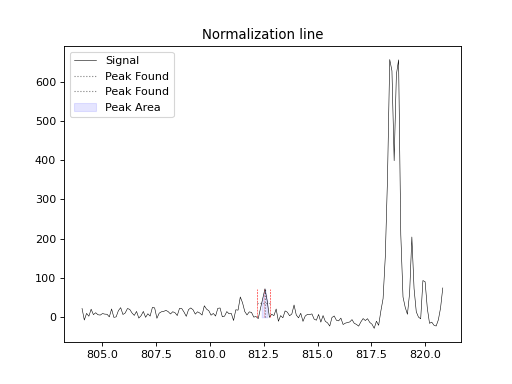

C:\Users\Diana\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=30,29 m=625 fp=677.020598 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


<IPython.core.display.Javascript object>


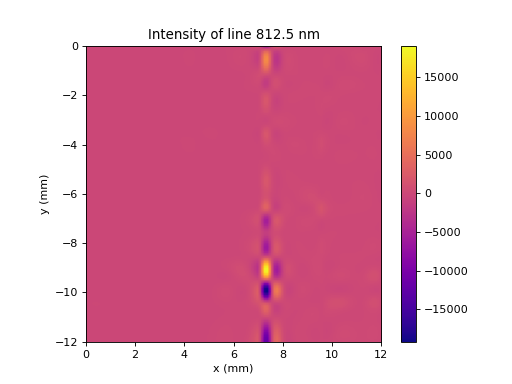

<IPython.core.display.Javascript object>


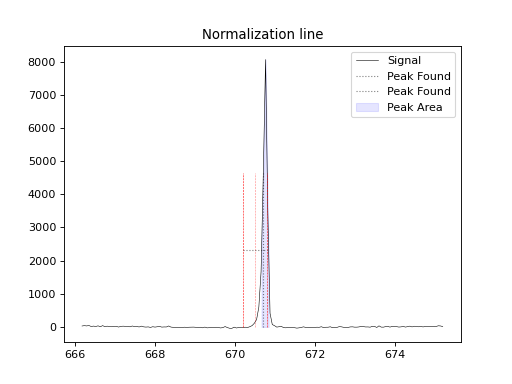

<IPython.core.display.Javascript object>


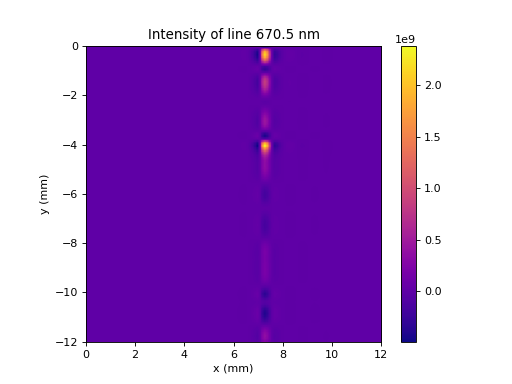

In [7]:
x_values,y_values,map_values = current_experiment.make_map(0,specific_wavelength = 812.5,ratio_of_maximum = 0.5, Plotline=True)
x_values,y_values,map_values1 = current_experiment.make_map(0,specific_wavelength = 670.5,ratio_of_maximum = 0.5, Plotline=True)

In [ ]:
#correct the z values position
map_values2=np.array(map_values).reshape(-1, 25).transpose()
map_values2=np.flip(map_values2, 0)

map_values3=np.array(map_values1).reshape(-1, 25).transpose()
map_values3=np.flip(map_values3, 0)

map_values=[]
for i in map_values2:
    for val in i:
        map_values.append(val)
        
map_values1=[]
for i in map_values3:
    for val in i:
        map_values1.append(val)

<IPython.core.display.Javascript object>


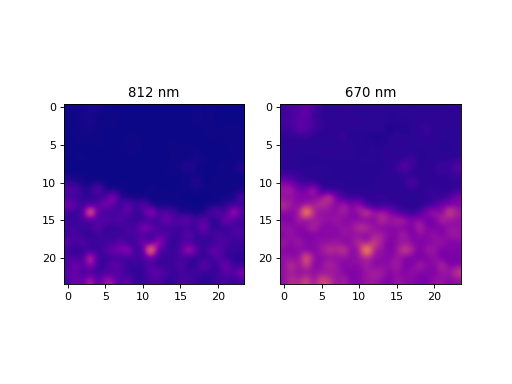

In [22]:
subplots()
f = interp2d(x_values,y_values,map_values,kind='linear')
f1 = interp2d(x_values,y_values,map_values1,kind='linear')

f = interp2d(x_values,y_values,map_values,kind='linear')
f1 = interp2d(x_values,y_values,map_values1,kind='linear')

xnew=np.arange(min(x_values),max(x_values),.5)
ynew=np.arange(min(y_values),max(y_values),.5)

subplot(121)
title("812 nm")
imshow(f(xnew,ynew), cmap = 'plasma', interpolation='bicubic')
colorbar()
clim(0, 7000)
subplot(122)
title('670 nm')
imshow(f1(xnew,ynew), cmap = 'plasma', interpolation='bicubic')
colorbar()
clim(0, 7000)

<IPython.core.display.Javascript object>


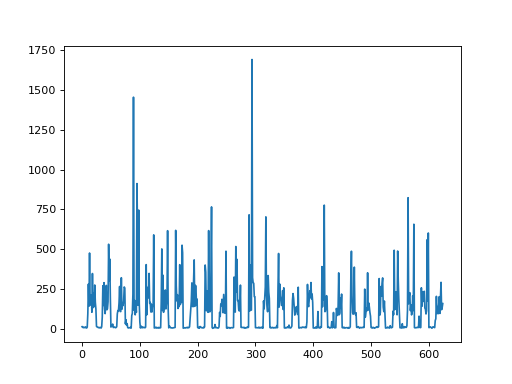

In [24]:
subplots()
plot(map_values)

<IPython.core.display.Javascript object>


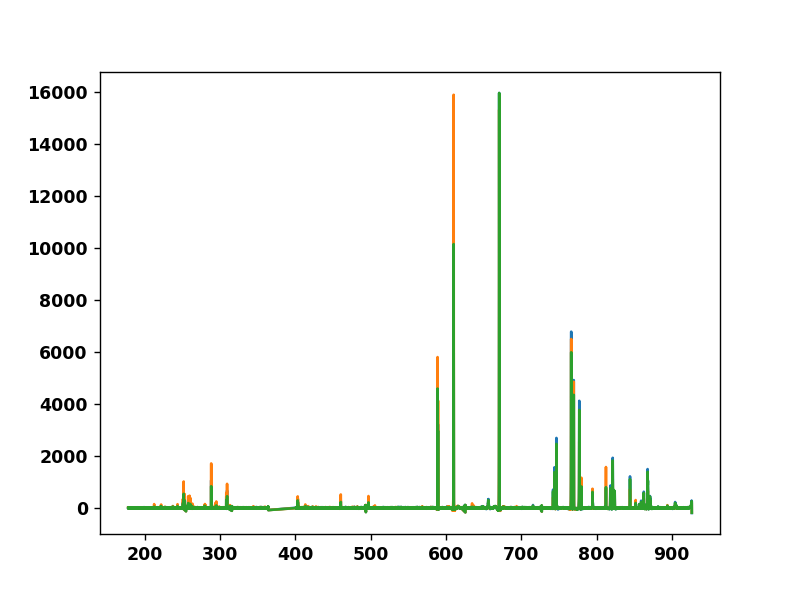

In [9]:
subplots()
i0 = 371*2-1
i1 = 371*2
i2 = 371*2+1
plot(np.array(current_experiment.list_of_signals[i0].wavelengths).flatten(),
     np.array(current_experiment.list_of_signals[i0].spectrum).flatten(),'-')

plot(np.array(current_experiment.list_of_signals[i1].wavelengths).flatten(),
     np.array(current_experiment.list_of_signals[i1].spectrum).flatten(),'-')

plot(np.array(current_experiment.list_of_signals[i2].wavelengths).flatten(),
     np.array(current_experiment.list_of_signals[i2].spectrum).flatten(),'-')

In [10]:
current_experiment.list_of_signals

[Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot1/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot1/
  with 7 spectrometers,
 Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot1/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot1/
  with 7 spectrometers,
 Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot10/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot10/
  with 7 spectrometers,
 Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot100/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot100/
  with 7 spectrometers,
 Signal for shot 0001
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot101/
  with 7 spectrometers,
 Signal for shot 0002
 at folder 
 data/Map/data/Mapa_Moscovite_final/spot101/
  wi

In [27]:
#folder = r"data/Map/data/Mapa_Moscovite_final/"
folder =  r'C:/Users/Diana/Desktop/INESC TEC 2021/Adaptative_Meshing/Mapa_final/'
folders = [folder+f+'/' for f in os.listdir(folder) if os.path.isdir(folder+f)]
current_experiment1 = experiment(folders[0])
list_of_experiments = [experiment(f) for f in folders]

current_experiment1.concatenate(list_of_experiments)

In [34]:
subplots()
i0 = 371*2-1
i1 = 371*2
i2 = 371*2+1

plot(np.array(current_experiment1.list_of_signals[i0].wavelengths).flatten(),
     np.array(current_experiment1.list_of_signals[i0].spectrum).flatten(),'-',label=str(i0))

plot(np.array(current_experiment1.list_of_signals[i1].wavelengths).flatten(),
     np.array(current_experiment1.list_of_signals[i1].spectrum).flatten(),'-',label=str(i1))

plot(np.array(current_experiment1.list_of_signals[i2].wavelengths).flatten(),
     np.array(current_experiment1.list_of_signals[i2].spectrum).flatten(),'-',label=str(i2))

legend()


"\nsubplots()\ni0 = 371*2-1\ni1 = 371*2\ni2 = 371*2+1\n\nplot(np.array(current_experiment1.list_of_signals[i0].wavelengths).flatten(),\n     np.array(current_experiment1.list_of_signals[i0].spectrum).flatten(),'-',label=str(i0))\n\nplot(np.array(current_experiment1.list_of_signals[i1].wavelengths).flatten(),\n     np.array(current_experiment1.list_of_signals[i1].spectrum).flatten(),'-',label=str(i1))\n\nplot(np.array(current_experiment1.list_of_signals[i2].wavelengths).flatten(),\n     np.array(current_experiment1.list_of_signals[i2].spectrum).flatten(),'-',label=str(i2))\n\nlegend()\n"

In [13]:
for i in range(len(current_experiment1.list_of_signals)):
    print('Removing baseline ' + str(i) + ' of ' +str(len(current_experiment1.list_of_signals)),end='\r')
    current_experiment1.list_of_signals[i].remove_baseline()
    current_experiment1.list_of_signals[i].normalize()

<IPython.core.display.Javascript object>


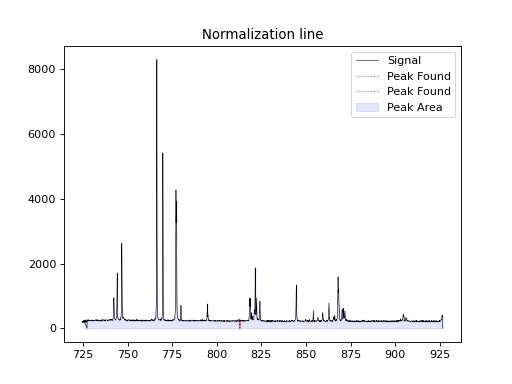

<IPython.core.display.Javascript object>


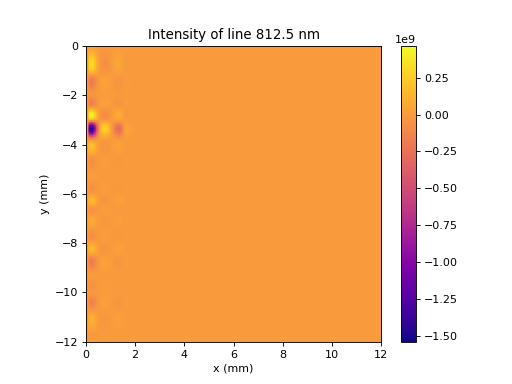

<IPython.core.display.Javascript object>


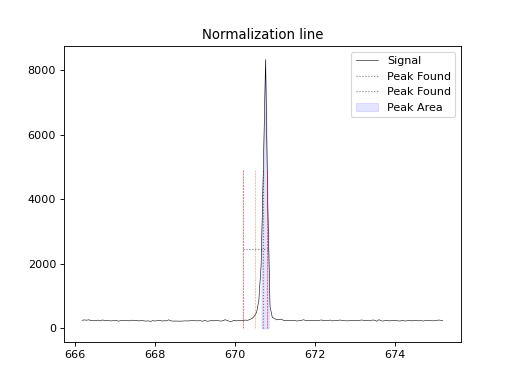

<IPython.core.display.Javascript object>


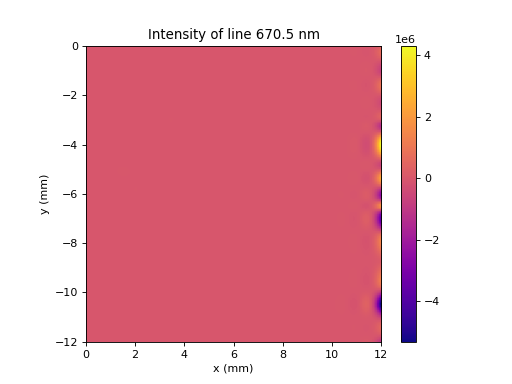

In [35]:
x_values,y_values,map_values = current_experiment1.make_map(0,specific_wavelength = 812.5,ratio_of_maximum = 0.5, Plotline=True)
x_values,y_values,map_values1 = current_experiment1.make_map(0,specific_wavelength = 670.5,ratio_of_maximum = 0.5, Plotline=True)

In [44]:
#correct the z values position
map_values2=np.array(map_values).reshape(-1, 25).transpose()
map_values2=np.flip(map_values2, 0)

map_values3=np.array(map_values1).reshape(-1, 25).transpose()
map_values3=np.flip(map_values3, 0)

map_values=[]
for i in map_values2:
    for val in i:
        map_values.append(val)
        
map_values1=[]
for i in map_values3:
    for val in i:
        map_values1.append(val)

<IPython.core.display.Javascript object>


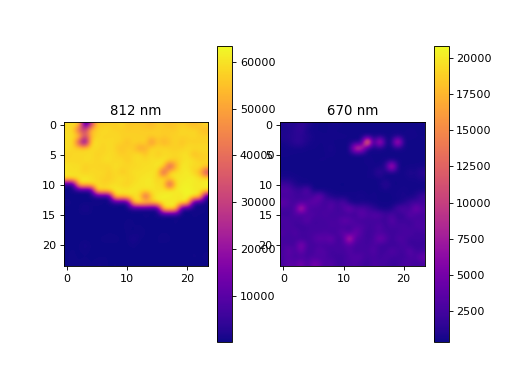

C:\Users\Diana\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=28,27 m=625 fp=508837.695666 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\Diana\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=28,27 m=625 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [60]:
subplots()
f = interp2d(x_values,y_values,map_values,kind='linear')
f1 = interp2d(x_values,y_values,map_values1,kind='linear')

xnew=np.arange(min(x_values),max(x_values),.5)
ynew=np.arange(min(y_values),max(y_values),.5)

subplot(121)
title("812 nm")
imshow(f(xnew,ynew), cmap = 'plasma', interpolation='bicubic')
colorbar()


subplot(122)
title('670 nm')
imshow(f1(xnew,ynew), cmap = 'plasma', interpolation='bicubic')
colorbar()


In [46]:
xx, yy = np.meshgrid(x_values,y_values)

<IPython.core.display.Javascript object>


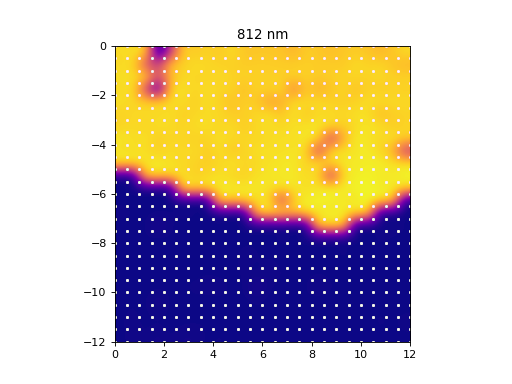

In [59]:
subplots()
plot(xx,yy,'o', ms=1, color='w',alpha=0.1)
title("812 nm")
imshow(f(xnew,ynew), extent=[min(x_values),max(x_values),min(y_values),max(y_values)], cmap = 'plasma', interpolation='bicubic')

In [61]:
print([(2**i+1) for i in range(0,5)])

[2, 3, 5, 9, 17]


In [62]:
np.sqrt(len(x_values))
x_l

NameError: name 'x_l' is not defined

In [63]:
x_l = np.unique(x_values)
y_l = np.unique(y_values)
list_x_reduced=[]
list_y_reduced=[]
for i in [4,7,13,25]:
    xs=[]
    ys=[]
    print(i,(len(x_l)-1)/(i-1))
    for j in range(0,len(x_l),(len(x_l)-1)//(i-1)):
        xs.append(x_l[j])
        ys.append(y_l[j])
    list_x_reduced.append(np.array(xs))
    list_y_reduced.append(np.array(ys))
list_x_reduced=np.array(list_x_reduced)
list_y_reduced = np.array(list_y_reduced)
print(list_x_reduced)

4 8.0
7 4.0
13 2.0
25 1.0
[array([ 0.,  4.,  8., 12.]) array([ 0.,  2.,  4.,  6.,  8., 10., 12.])
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. ])                                               ]


<ipython-input-63-c69261c4cc04>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_x_reduced=np.array(list_x_reduced)
<ipython-input-63-c69261c4cc04>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_y_reduced = np.array(list_y_reduced)


In [64]:
i = 0
new_x = list_x_reduced[i]
new_y = list_y_reduced[i]
new_xx, new_yy = np.meshgrid(new_x,new_y)
old_xx, old_yy = np.meshgrid(x_values, y_values)
new_mesh = np.stack((new_xx,new_yy),axis=-1)
old_mesh = np.stack((old_xx, old_yy),axis=-1)

In [65]:
new_xx.reshape(new_xx.shape[0],new_xx.shape[1],1)


array([[[ 0.],
        [ 4.],
        [ 8.],
        [12.]],

       [[ 0.],
        [ 4.],
        [ 8.],
        [12.]],

       [[ 0.],
        [ 4.],
        [ 8.],
        [12.]],

       [[ 0.],
        [ 4.],
        [ 8.],
        [12.]]])

8


<IPython.core.display.Javascript object>


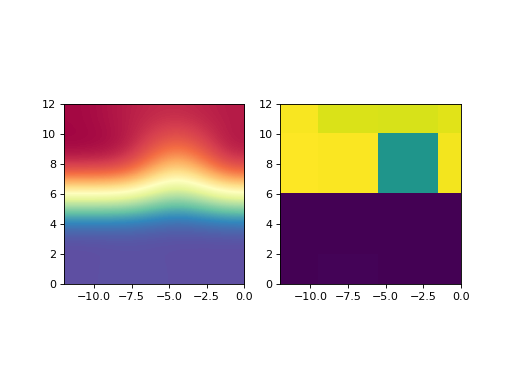

4


<IPython.core.display.Javascript object>


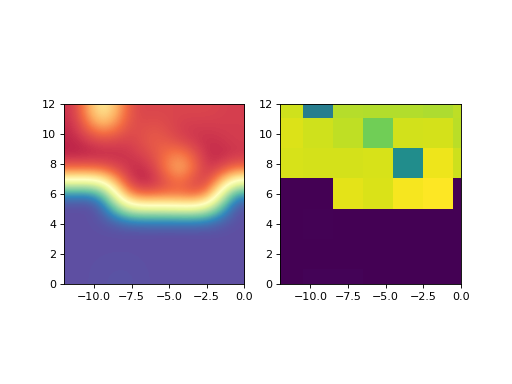

2


<IPython.core.display.Javascript object>


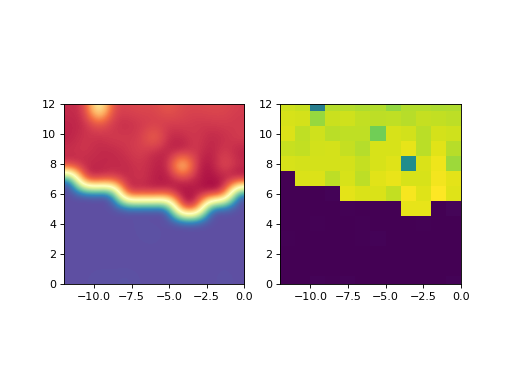

1


<IPython.core.display.Javascript object>


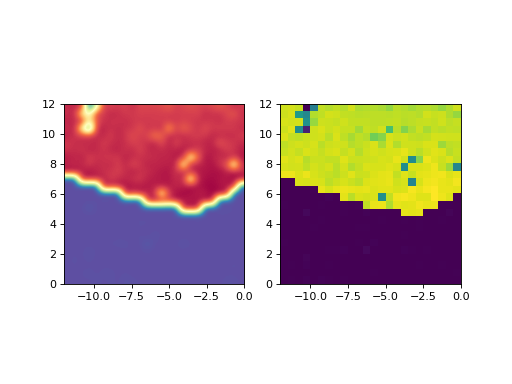

<IPython.core.display.Javascript object>


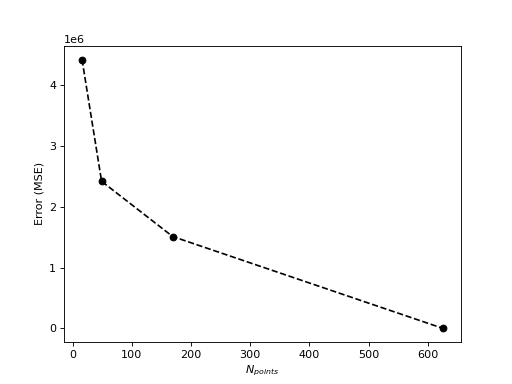

Text(0, 0.5, 'Error (MSE)')

In [112]:
data = []
n_points = [4,7,13,25] # [4,7,13,25]
for l in n_points:
    new_x_values=[]
    new_y_values=[]
    reduced_map_values=[]
    
    step = (len(x_l)-1)//(l-1)
    print(step)
    for i in range(0,len(x_l),step):
        for j in range(0,len(y_l),step):
            new_x_values.append(x_values[i*len(y_l)+j])
            new_y_values.append(y_values[i*len(y_l)+j])
            reduced_map_values.append(map_values[i*len(y_l)+j])
            
    new_x_l = np.unique(new_x_values)
    new_y_l = np.unique(new_y_values)
    
    new_map_values = np.zeros((l,l))
    x_coordinates = np.zeros((l,l))
    y_coordinates = np.zeros((l,l))
    
    for i in range(0,l):
        for j in range(0,l):
            x_coordinates[i,j] = new_x_values[i*len(new_y_l)+j]
            y_coordinates[i,j] = new_y_values[i*len(new_y_l)+j]
            new_map_values[i,j]= reduced_map_values[i*len(new_y_l)+j]
    
  
    new_map_values2=new_map_values.transpose()
  
    subplots()
    subplot(121)
    
    imshow(new_map_values2, extent=[int(min(new_y_values)),int(max(new_y_values)), int(min(new_x_values)),int(max(new_x_values))], 
                                interpolation='bicubic',cmap='Spectral_r')
   
    
    new_map_values=np.flip(new_map_values, 1)
    f = NearestNDInterpolator(list(zip(new_x_values, new_y_values)),new_map_values.flatten())
    #f1 = interp2d(new_x_values,new_y_values,new_map_values,kind='linear')
    subplot(122)
    x_nn = np.arange(0,12,0.5)
    y_nn = np.arange(0,12,0.5)
    X, Y = np.meshgrid(x_nn, -y_nn)
    #imshow(np.transpose(f1(x_values,y_values)))
    #imshow(np.transpose(f(X,Y)))
    imshow(f(X,Y), extent=[int(min(new_y_values)),int(max(new_y_values)), int(min(new_x_values)),int(max(new_x_values))])
    
    x_nn = np.arange(0,12,0.5)
    y_nn = np.arange(0,12,0.5)
    data.append(np.transpose(f(X,Y)))
    #data.append(f(X,Y))
    

data = np.array(data)
errors = [np.sum(np.abs(data[i] - data[-1])) for i in range(0,len(data))]
#errors = np.sqrt([np.linalg.norm(data[i] - data[-1]) for i in range(0,len(data))])
subplots()
plot(np.array(n_points)**2, errors,'o',ls='--',color='k')
xlabel(r'$N_{points}$')
ylabel('Error (MSE)')

<IPython.core.display.Javascript object>


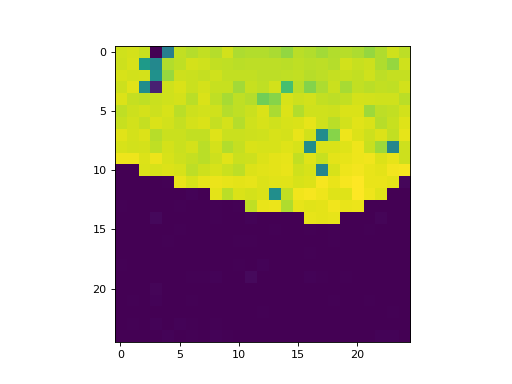

In [114]:
subplots()
imshow(np.array(map_values).reshape((25,25)).transpose())

In [115]:
from adaptative_mesh_alg1 import *

<IPython.core.display.Javascript object>


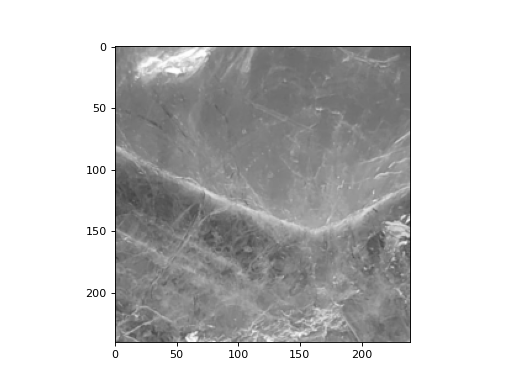

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [130]:
#converter para 240*240
#path='r1.png'
path=r'C:\Users\Diana\Desktop\INESC TEC 2021\Adaptative_Meshing\Git_Code\moscov_ini_cut.jpg'
rock_image=image(path)
my_mesh = Mesh(rock_image)

rock_image.ROI_data_gray.shape
subplots()
import skimage
from skimage.transform import rescale, resize, downscale_local_mean, rotate
rescale = resize((rock_image.ROI_data_gray), (240,240,3))
rescale = rotate(rescale, 270)[:, ::-1]
imshow(rescale)
skimage.io.imsave("r1.png", rescale)

<IPython.core.display.Javascript object>


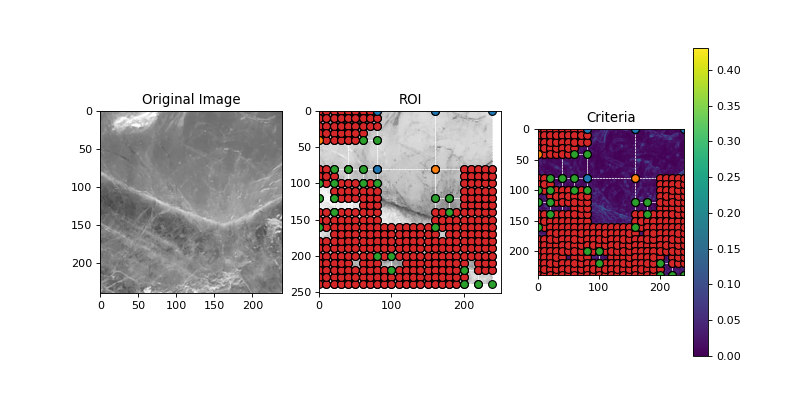

C:\Users\Diana\anaconda3\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=20,23 m=359 fp=0.274707 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
<ipython-input-137-e58d28553673>:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  subplots()


<IPython.core.display.Javascript object>


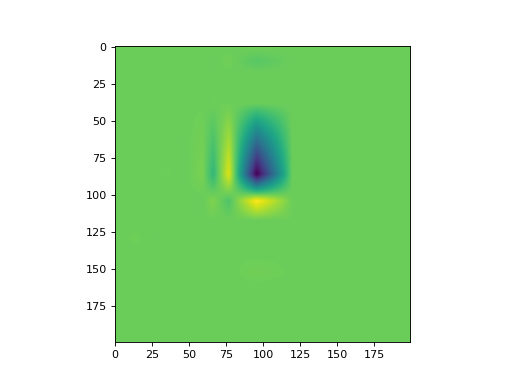

In [137]:
path='r1.png'
rock_image=image(path)
my_mesh = Mesh(rock_image)

subplots(figsize=[10,5])

subplot(131)
rock_image.plot_all()

subplot(132)
rock_image.plot_ROI(gray=True)
#threshold = 0.009 #0.75#0.05
threshold = 0.028

my_mesh.adaptative_mesh(threshold, max_num_divisions=2)
coordinate = my_mesh.plot()

subplot(133)
coordinate = my_mesh.plot()
rock_image.plot_criteria()

x_values0, y_values0, map_values0 = my_mesh.get_coordinates_and_values(rock_image.ROI_data_gray)

from scipy.interpolate import *

f = interp2d(x_values0,y_values0,map_values0)
subplots()
x_new = np.arange(0,200)
y_new = np.arange(0,200)
imshow(f(x_new, y_new), interpolation='bicubic')

In [219]:
np.unique(x_values)/(rock_image.x_max//24)/2

array([ 0. ,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,
        9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ])

In [454]:
x_values1 = np.array(x_values0)/(rock_image.x_max//24)/2
y_values1 = np.array(y_values0)/(rock_image.y_max//24)/2

unique_x = np.unique(x_values1)
unique_y = np.unique(y_values1)
new_x_values=[]
new_y_values=[]
new_map_values1=[]

xy_values = np.stack([x_values,np.abs(y_values)],axis=1)
xy_values1 = np.stack([x_values1,np.abs(y_values1)],axis=1)

for i in range(0,len(unique_x)):
    for j in range(0,len(unique_y)):
        current_x = unique_x[i] 
        current_y = unique_y[j]
        temp = (xy_values == [current_x,current_y])[:,0]*(xy_values == [current_x,current_y])[:,1]
        temp1 = (xy_values1 == [current_x,current_y])[:,0]*(xy_values1 == [current_x,current_y])[:,1]
        #try:
        indexes1 = np.where(temp1 == True)[0]
        #print(indexes1)
        if indexes1.shape!=(0,):
            #print(indexes1.shape)
            indexes = np.where(temp == True)[0]
            new_x_values.append(current_x)
            new_y_values.append(current_y)
            new_map_values1.append(np.mean(reduced_map_values[indexes[0]]))
                #print(indexes)
        #except:
         #   pass
            

f = NearestNDInterpolator(list(zip(new_x_values, new_y_values)),new_map_values1)

In [455]:
len(new_map_values)

25

<IPython.core.display.Javascript object>


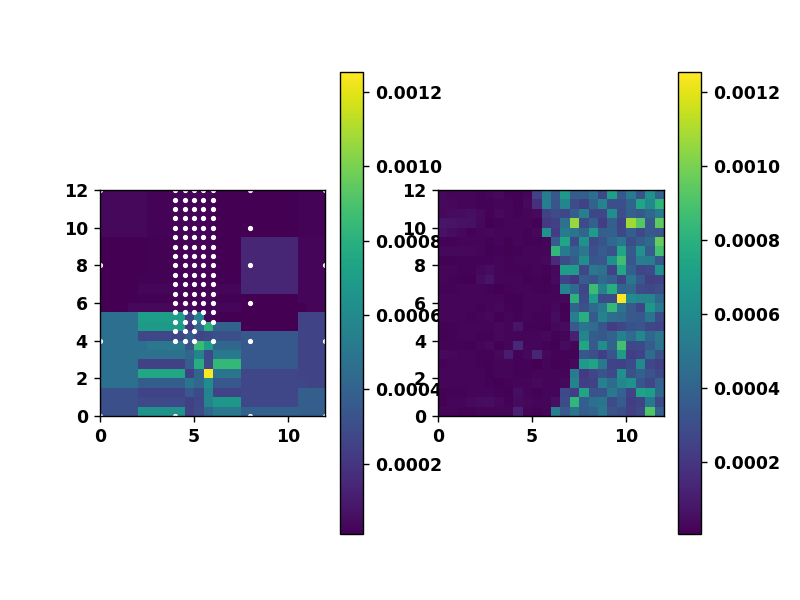

0.046293573064434844


In [456]:
subplots()
x_nn = x_values
y_nn = np.abs(y_values)
x_nn = np.arange(0,12,0.5)
y_nn = np.arange(0,12,0.5)
X, Y = np.meshgrid(x_nn, y_nn) 
subplot(121)
prediction = f(X,Y)
imshow(np.transpose(prediction),extent=[0,12,0,12])
coordinates = np.stack([new_x_values,new_y_values],axis=1)
plot(coordinates[:,1],coordinates[:,0],'o', ms=2.,color='w')
colorbar()
subplot(122)
dd = f1(x_nn,-y_nn)
imshow(dd[::-1,::1],extent=[0,12,0,12])
colorbar()
error = np.sum( np.abs(prediction - dd[::-1,::1]))
print(error)

In [435]:
print(errors,np.array(n_points)**2)

[0.06508341261932837, 0.055793826910843586, 0.046942785528949656, 0.0] [ 16  49 169 625]


In [441]:
len(new_y_values)

97

In [381]:
dd.shape

(120, 120)

In [289]:
len(reduced_map_values)


625

In [278]:
np.unique((np.stack([x_values1,y_values1],axis=1)).astype(int),axis=0).shape

(100, 2)

In [249]:
(xy_values == [current_x,current_y])[:,0]

array([ True,  True, False, ..., False, False, False])

<IPython.core.display.Javascript object>


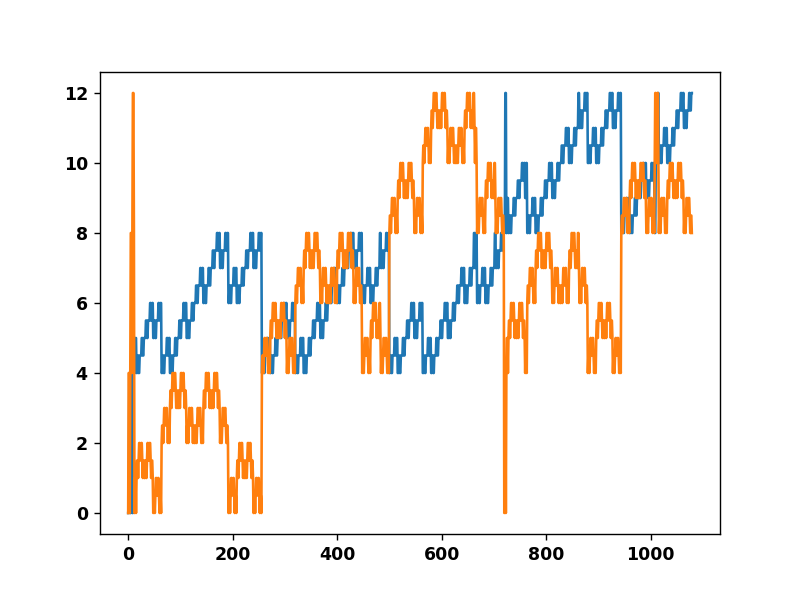

In [253]:
subplots()
plot(x_values1)
plot(y_values1)